# Final Project Submission

Please fill out:
* Student name: Anila Qureshi, Marwan Kalo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

## What data are we dealing with?

### Import Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

### Import Dataset and Inspect

In [89]:
df = pd.read_csv('../dsc-mod-2-project-v2-1-london-ds-02172020/raw_data/kc_house_data.csv')
print(df.shape)
print(df.keys())
df.head()

(21597, 21)
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Cleaning Data

In [90]:
# Dropping null (NaN) values 
df = df.dropna()
print(df.shape)
df

(15762, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [93]:
# Dropping values containing '?' in sqft_basement column
df = df[df.sqft_basement != '?']
print(df.shape)
df

(15429, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [192]:
# Converting float values to integers for efficient future manipulation
df['price'] = (df['price']).astype(int)
df['floors'] = (df['floors']).astype(int)
df['sqft_basement'] = (df['sqft_basement']).astype(int)
df['view'] = (df['view']).astype(int)
df['waterfront'] = (df['waterfront']).astype(int)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


### Now that we have cleaned, let's check some descriptive statistics

In [193]:
print("Median House Sale Price: $",df['price'].median())

Median House Sale Price: $ 450000.0


In [194]:
print("Mean House Sale Price: $",round(df['price'].mean(),2))

Mean House Sale Price: $ 541497.78


In [195]:
df['price'].describe()

count    1.542900e+04
mean     5.414978e+05
std      3.730219e+05
min      8.200000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.435000e+05
max      7.700000e+06
Name: price, dtype: float64

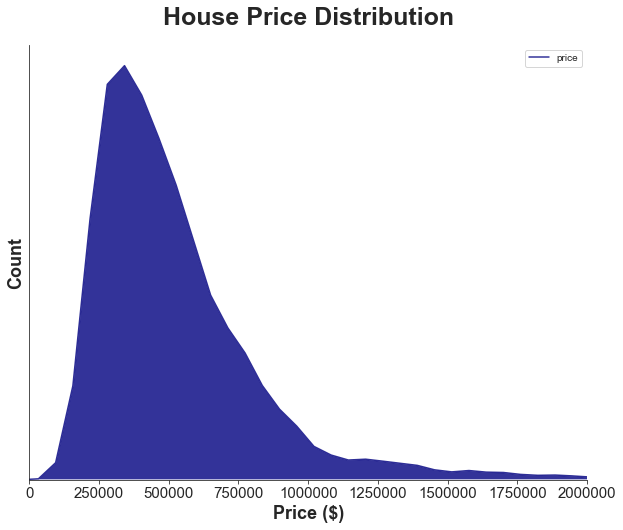

In [196]:
# A histogram showing distribution of price (capped at $2 mil for a more accurate visualisation)
fig, ax = plt.subplots(figsize=(10,8))

sns.kdeplot(df['price'], shade=True, color='navy',alpha=0.8)
sns.despine()

plt.yticks([])
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_title('House Price Distribution', fontsize=25, loc='center', weight='bold', pad=20)
ax.set_xlabel('Price ($)', fontsize=18, weight='bold')
ax.set_ylabel('Count', fontsize=18, weight='bold')

plt.xlim(0,2000000)
plt.show()

In [197]:
# Preparing the data for a heatmap visualisation of house price sales across King County
# This will give us an overview of the distribution of price across the geography in question

price = df['price'].tolist()
latitude = df['lat'].tolist()
longitude = df['long'].tolist()

price_multiple = []
for x in price:
    price_multiple.append(x/100000)

In [198]:
price_multiple

[5.38,
 6.04,
 5.1,
 12.3,
 2.295,
 3.23,
 4.68,
 4.0,
 5.3,
 6.5,
 3.95,
 4.85,
 2.3,
 3.85,
 20.0,
 2.85,
 3.29,
 2.33,
 6.67,
 7.19,
 5.805,
 2.8,
 6.875,
 5.35,
 3.225,
 6.96,
 5.5,
 6.4,
 2.4,
 6.05,
 7.75,
 6.85,
 3.09,
 2.1049,
 7.85,
 4.5,
 13.5,
 2.28,
 3.45,
 5.85,
 9.2,
 3.01,
 4.3,
 2.89,
 5.49,
 4.25,
 3.17625,
 2.87,
 13.3,
 10.4,
 3.25,
 5.71,
 3.49,
 8.325,
 4.1,
 3.9,
 3.6,
 3.55,
 3.56,
 3.15,
 9.4,
 3.05,
 2.435,
 11.0,
 1.53,
 4.3,
 7.0,
 9.05,
 2.475,
 1.99,
 3.14,
 4.375,
 8.5083,
 5.55,
 6.9995,
 10.9,
 2.9,
 4.6,
 1.885,
 6.8,
 4.7,
 5.7,
 3.2995,
 5.185,
 2.05425,
 5.35,
 6.6,
 3.95,
 7.7,
 14.5,
 2.12,
 6.605,
 7.84,
 4.53246,
 6.75,
 2.2,
 3.825,
 6.65,
 2.05,
 5.0,
 9.215,
 8.9,
 4.3,
 2.58,
 5.11,
 5.3217,
 5.6,
 22.5,
 3.5,
 2.15,
 6.5,
 3.2,
 2.47,
 3.2,
 2.55,
 4.38,
 9.0,
 4.41,
 4.2,
 3.7,
 2.6995,
 8.071,
 6.53,
 2.84,
 9.175,
 6.73,
 4.25,
 3.9995,
 2.6995,
 2.6,
 4.7,
 1.635,
 8.35,
 11.0,
 2.69,
 5.85188,
 1.6695,
 7.99,
 4.0,
 2.3,
 2.56883,
 4.23

In [199]:
coords_and_weights = zip(latitude, longitude, price_multiple)

In [200]:
# An interactive sale price heatmap
heat_map = folium.Map([47.477993, -122.206452],
                     zoom_start = 11.5)
heat_map
HeatMap(coords_and_weights,radius=10).add_to(heat_map)
heat_map

## A closer look at our feature variables

In [201]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113


In [202]:
# Identifying the categorical features in our dataset and their unique values which we can then encode
print(np.sort(df['bedrooms'].unique()))
print(np.sort(df['bathrooms'].unique()))
print(np.sort(df['floors'].unique()))
print(np.sort(df['waterfront'].unique()))
print(np.sort(df['view'].unique()))
print(np.sort(df['grade'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 33]
[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.75 7.5  7.75 8.  ]
[1 2 3]
[0 1]
[0 1 2 3 4]
[ 3  4  5  6  7  8  9 10 11 12 13]


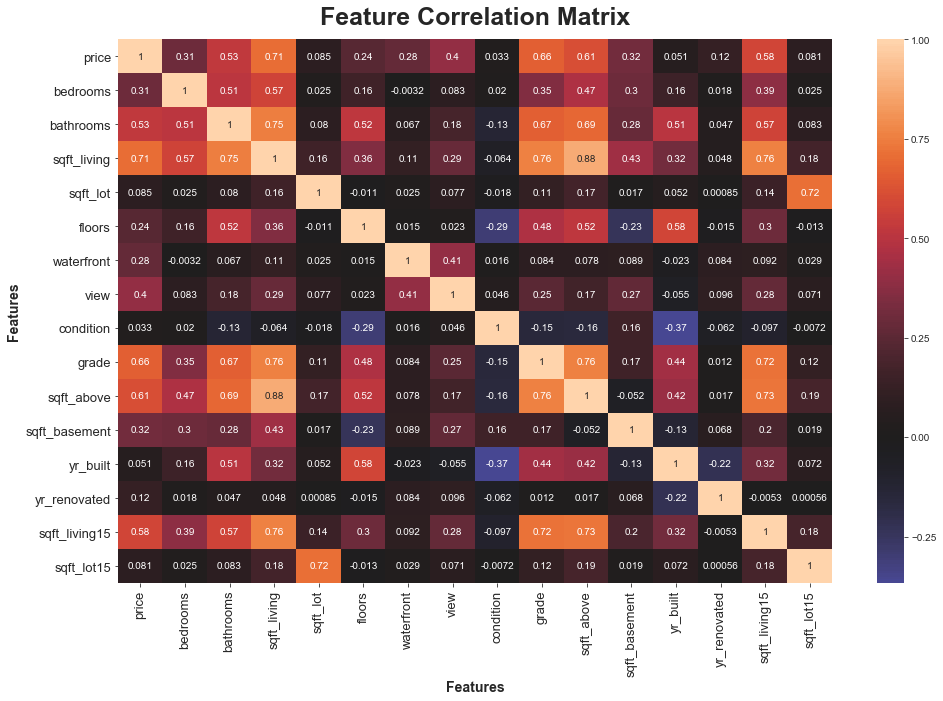

In [214]:
# Choosing features to check for multicollinearity 
df_multicoll = df.drop(['id','zipcode', 'lat', 'long'], axis=1)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df_multicoll.corr(), center=0, annot=True)

ax.set_title('Feature Correlation Matrix', fontsize=25, loc='center', weight='bold', pad=15)
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('Features', fontsize=14, weight='bold')
ax.tick_params(axis='both', which='major', labelsize=13)
plt.autoscale()
plt.show()

In [215]:
# # A boxplot showing the variance of the grade feature as it increases (heteroscedacity)


# var = 'grade'
# data = pd.concat([df['price'], df[var]], axis=1)

# f, ax = plt.subplots(figsize=(14, 10))
# fig = sns.boxplot(x=var, y = 'price', data=data, palette='dark')

# ax.set_title('Feature Variance: Grade', fontsize=25, loc='center', weight='bold', pad=10)
# ax.set_xlabel('Grade', fontsize=14, weight='bold')
# ax.set_ylabel('Price ($)', fontsize=14, weight='bold')
# ax.tick_params(axis='both', which='major', labelsize=13)

# sns.despine()
# fig.axis(ymin=0, ymax=8000000);